# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
# df = pd.read_csv('output/q4_features.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
df = pd.read_csv('output/q4_features.csv')
df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
print(f"Loaded {len(df):,} records with features")
print(df.columns.tolist())

Loaded 196,321 records with features
['Measurement Timestamp', 'Station Name', 'Air Temperature', 'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain', 'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation', 'Heading', 'Battery Life', 'Measurement Timestamp Label', 'Measurement ID', 'air_temp_diff_1h', 'humidity_temp_ratio', 'wind_speed_squared']


---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.


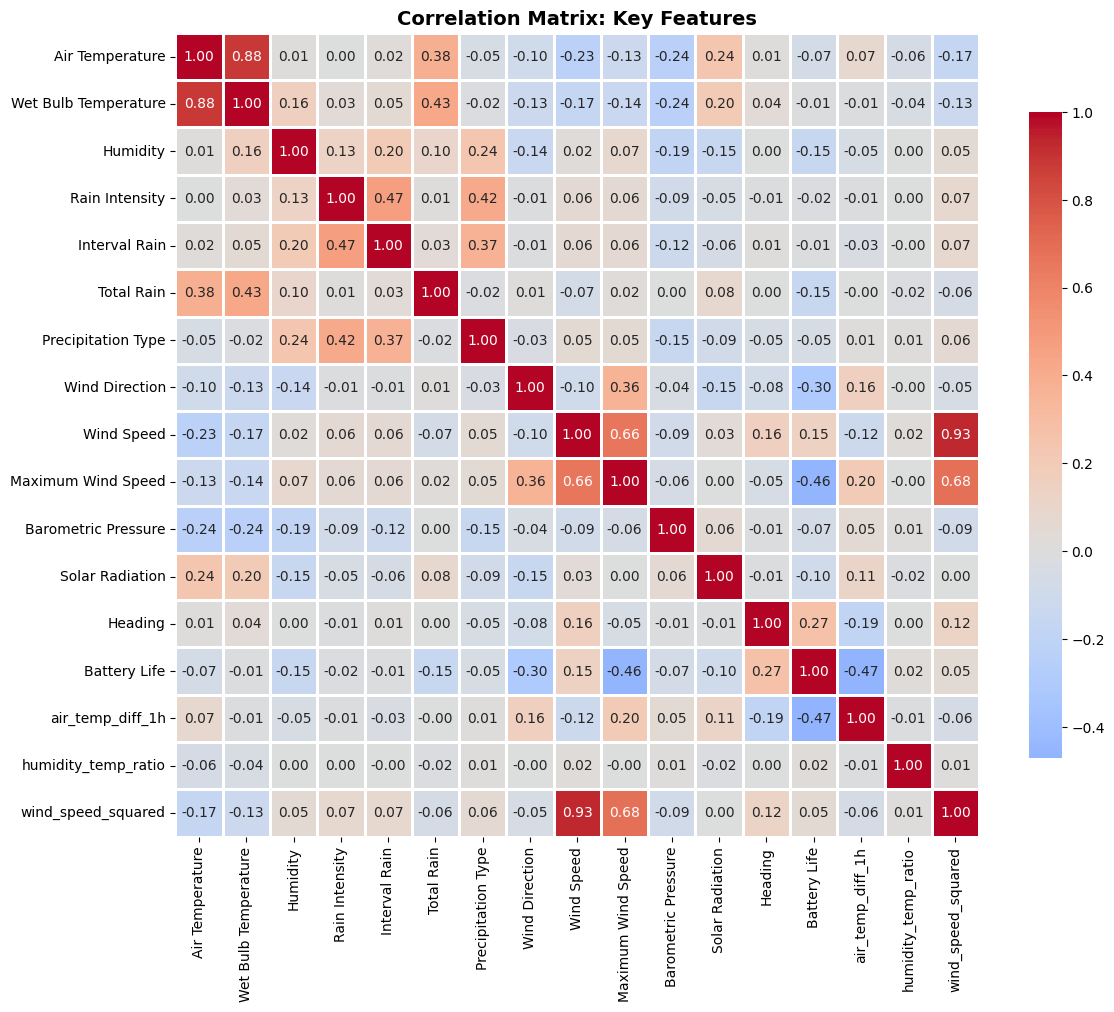

'### Strongest Correlations (|r| > 0.5)'

'- **Wind Speed** ↔ **wind_speed_squared**: `0.930`\n- **Air Temperature** ↔ **Wet Bulb Temperature**: `0.880`\n- **Maximum Wind Speed** ↔ **wind_speed_squared**: `0.680`\n- **Wind Speed** ↔ **Maximum Wind Speed**: `0.660`'

In [6]:
# Select numeric features for correlation
numeric_features = df.select_dtypes(include='number')

corr_matrix = numeric_features.corr().round(2)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Key Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strongest correlations
display("### Strongest Correlations (|r| > 0.5)")

corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

corr_list = "\n".join([f"- **{feat1}** ↔ **{feat2}**: `{corr:.3f}`"
                       for feat1, feat2, corr in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)])
display(corr_list)

corr_matrix.to_csv('output/q5_correlations.csv')


/tmp/ipykernel_60244/784994498.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_humidity = df['Humidity'].resample("M").mean()


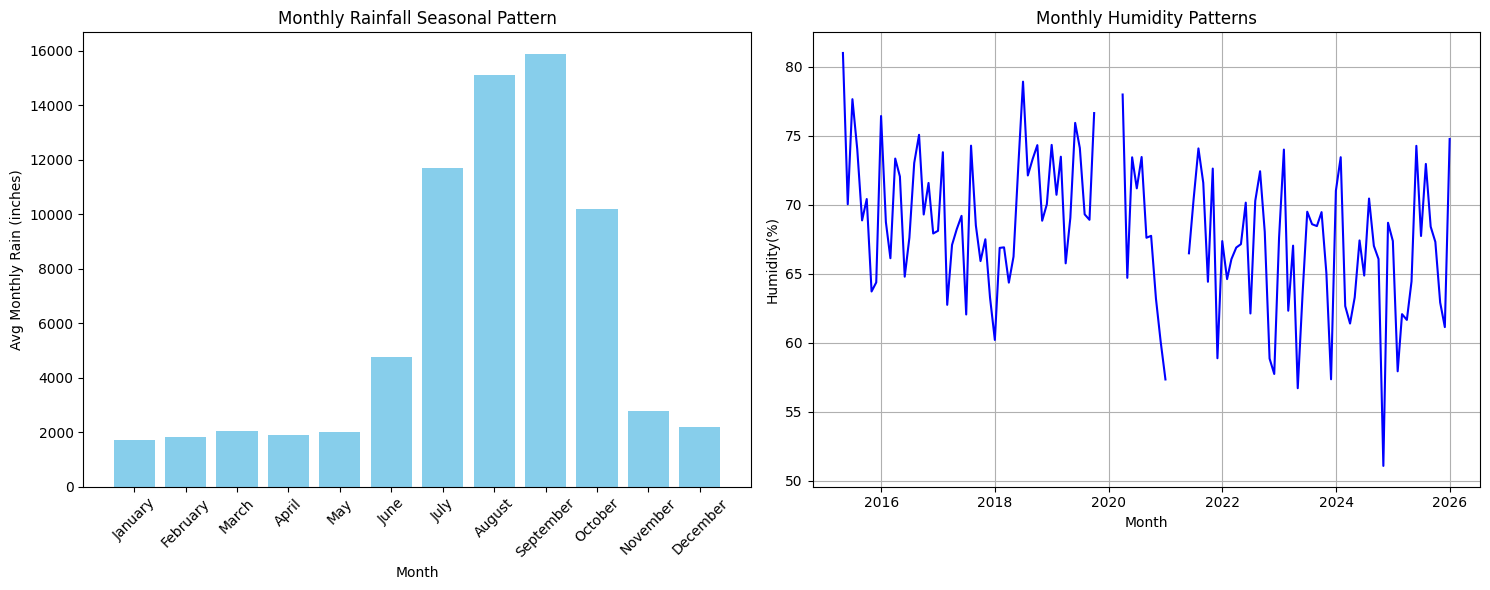

In [7]:
import os


df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
df = df.set_index('Measurement Timestamp', drop=False).sort_index()

monthly_humidity = df['Humidity'].resample("M").mean()

daily_rain = df["Total Rain"].resample("D").sum().to_frame(name="Daily Rain")

# Extract month number + month name
daily_rain["month"] = daily_rain.index.month
daily_rain["month_name"] = daily_rain.index.month_name()

# Average rainfall per month
monthly_pattern = daily_rain.groupby("month_name")["Daily Rain"].mean()

# Ensure Jan → Dec order
monthly_pattern = monthly_pattern.reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  

# Plot humidity time series
axes[1].plot(monthly_humidity.index, monthly_humidity.values, color='blue')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Humidity(%)')
axes[1].set_title('Monthly Humidity Patterns')
axes[1].grid(True)

axes[0].bar(monthly_pattern.index, monthly_pattern.values, color="skyblue")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Avg Monthly Rain (inches)")
axes[0].set_title("Monthly Rainfall Seasonal Pattern")
axes[0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('output/q5_patterns.png', dpi = 300, bbox_inches = "tight")
plt.show()



In [8]:
import os

with open("output/q5_trend_summary.txt", "w") as f:
    f.write("KEY PATTERNS IDENTIFIED \n ============== \n\n")
    f.write(f"TEMPORAL TRENDS: \n")
    f.write(f" - Rainfall and humidity show a seasonal patterns \n")
    f.write(f" - More rainfall is seen during expected late summer through early winter months \n")
    f.write(f" - Humidity varies throughout the year, but spikes during presumably summer and fall months \n")
    f.write(f" - Humidity percentage ranges from 51% to about 80% \n\n")
    f.write(f"MONTHLY PATTERNS: \n")
    f.write(f" - The greatest difference in rainfall monthly is about 14,000 inches \n")
    f.write(f" - Humidity drops severly in the end of 2024 \n")
    f.write(f" - Overall humidity is trending down \n\n")
    f.write(f"CORRELATIONS: \n")
    f.write(f" - Air temp vs Wet Bulb Temp: 0.830 (strong positive correlation) \n")
    f.write(f" - Maximum wind speed vs wind speed squared: (moderate positive correlation) \n")